# Dataset 2 de reserva de hotel

In [2]:
import pandas as pd
df = pd.read_csv(r"C:\Users\HP\anaconda3\codigos\Machine-Learning2\hr.csv", encoding='iso-8859-1')

In [3]:
df.shape

(36275, 19)

# Análisis Exploratorio de Datos

In [5]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [7]:
df.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

In [8]:
df['type_of_meal_plan'].value_counts()

type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64

In [9]:
df['room_type_reserved'].value_counts()

room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64

In [10]:
df['market_segment_type'].value_counts()

market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

In [11]:
df['booking_status'].value_counts()

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df['arrival_year'].value_counts()

arrival_year
2018    29761
2017     6514
Name: count, dtype: int64

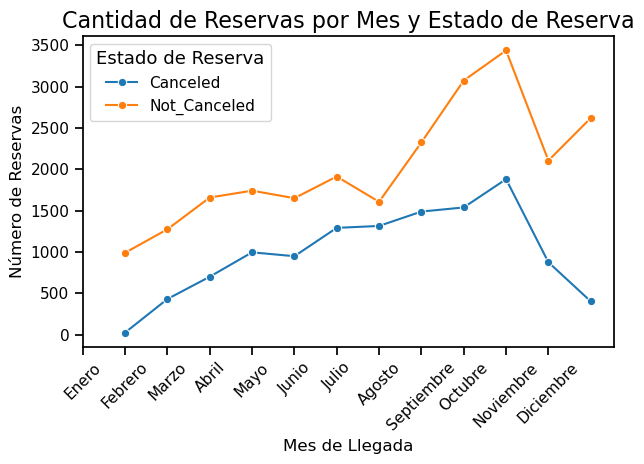

In [14]:
sns.set_context('notebook')
df['booking_status'] = df['booking_status'].astype('category')

monthly_reservations = df.groupby(['arrival_month', 'booking_status'], observed=False).size().reset_index(name='reservation_count')
sns.lineplot(data=monthly_reservations, x='arrival_month',  marker='o', y='reservation_count', hue='booking_status')

plt.title('Cantidad de Reservas por Mes y Estado de Reserva', fontsize=16)
plt.xlabel('Mes de Llegada')
plt.ylabel('Número de Reservas')
plt.xticks(ticks=range(12), labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], rotation=45)
handles, labels = plt.gca().get_legend_handles_labels()
label_dict = {'0': '1 - Cancelado', '1': '0 - No Cancelado'}
new_labels = [label_dict[label] if label in label_dict else label for label in labels]
plt.legend(handles, new_labels, title='Estado de Reserva', title_fontsize='13', fontsize='11')

plt.tight_layout()
plt.savefig(r'graph/M2/1.png')
plt.show()

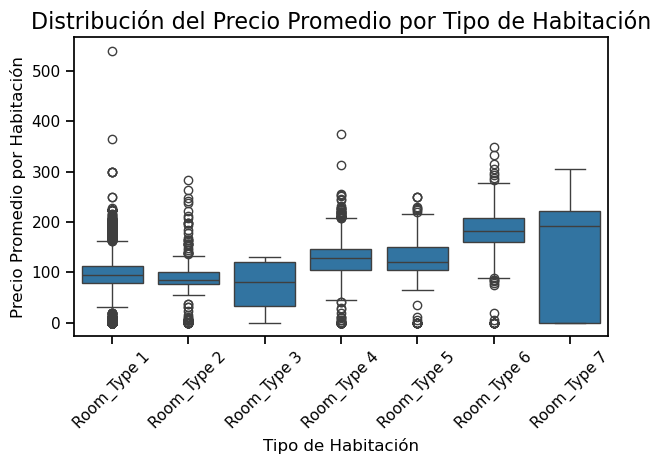

In [15]:
room_type_order = ['Room_Type 1', 'Room_Type 2', 'Room_Type 3', 'Room_Type 4', 'Room_Type 5', 'Room_Type 6', 'Room_Type 7']
df['room_type_reserved'] = pd.Categorical(df['room_type_reserved'], categories=room_type_order, ordered=True)
sns.boxplot(data=df, x='room_type_reserved', y='avg_price_per_room')

plt.title('Distribución del Precio Promedio por Tipo de Habitación', fontsize=16)
plt.xlabel('Tipo de Habitación', fontsize=12)
plt.ylabel('Precio Promedio por Habitación', fontsize=12)

plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig(r'graph/M2/2.png')
plt.show()

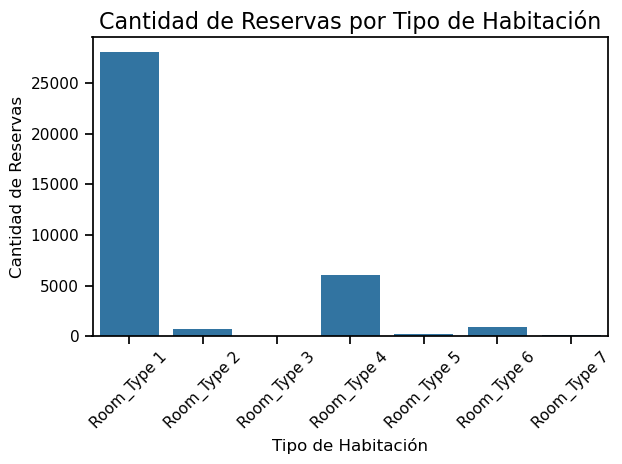

In [16]:
room_type_counts = df['room_type_reserved'].value_counts().sort_index()

sns.barplot(x=room_type_counts.index, y=room_type_counts.values)

plt.title('Cantidad de Reservas por Tipo de Habitación', fontsize=16)
plt.xlabel('Tipo de Habitación')
plt.ylabel('Cantidad de Reservas')

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(r'graph/M2/3.png')
plt.show()


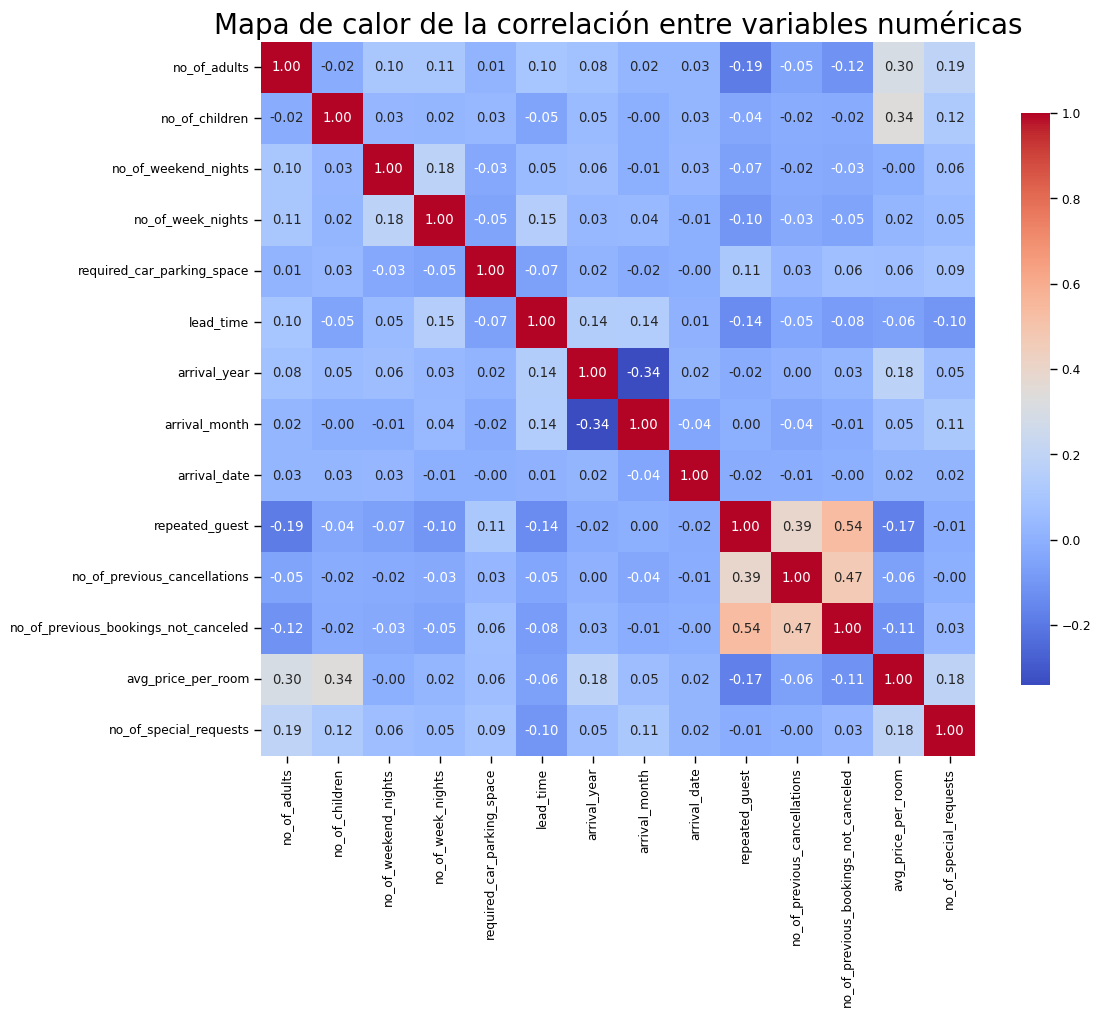

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context('paper')
numerical_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

plt.title('Mapa de calor de la correlación entre variables numéricas', fontsize=20)
plt.tight_layout()
plt.savefig(r'graph/M2/4.png')
plt.show()

# Procesamiento de datos

In [19]:
df_t = df
df_t.drop(['Booking_ID'], axis= 1, inplace = True )
df_t.dtypes

no_of_adults                               int64
no_of_children                             int64
no_of_weekend_nights                       int64
no_of_week_nights                          int64
type_of_meal_plan                         object
required_car_parking_space                 int64
room_type_reserved                      category
lead_time                                  int64
arrival_year                               int64
arrival_month                              int64
arrival_date                               int64
market_segment_type                       object
repeated_guest                             int64
no_of_previous_cancellations               int64
no_of_previous_bookings_not_canceled       int64
avg_price_per_room                       float64
no_of_special_requests                     int64
booking_status                          category
dtype: object

In [20]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df_t[col] = le.fit_transform(df_t[col]).astype('int64')
    label_encoders[col] = le

In [21]:
df_t.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                         int64
required_car_parking_space                int64
room_type_reserved                        int64
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                       int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                            int64
dtype: object

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

In [23]:
X = df_t.drop(columns=['booking_status'])
y=df_t['booking_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo Random Forest

In [25]:
model = RandomForestClassifier(random_state=1, n_estimators=150)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150, random_state=1)

In [26]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy del modelo:", accuracy)
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))

Accuracy del modelo: 0.9054445210199862

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.89      0.82      0.85      2416
           1       0.91      0.95      0.93      4839

    accuracy                           0.91      7255
   macro avg       0.90      0.88      0.89      7255
weighted avg       0.90      0.91      0.90      7255



# Modelo XGBoost

In [28]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [29]:
xgb_model = xgb.XGBClassifier(booster = 'gbtree', n_estimators = 300, random_state=3, max_depth = 5)
#xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=3, ...)

In [30]:
y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy del modelo: {accuracy}')

print(classification_report(y_test, y_pred))

Accuracy del modelo: 0.8941419710544453
              precision    recall  f1-score   support

           0       0.86      0.81      0.84      2416
           1       0.91      0.94      0.92      4839

    accuracy                           0.89      7255
   macro avg       0.89      0.87      0.88      7255
weighted avg       0.89      0.89      0.89      7255

